<a href="https://colab.research.google.com/github/visualdatabase/fastdup/blob/main/examples/fastdup_model_support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fastdup tutorial: 
Use your own onnx model to perform image similarity. This this notebook we compute embedding once with cityscape-resent model and once with fastdup model and compare the rsults in terms of the outliers obtained for the same dataset.

## Install fastdup

In [1]:
pip install fastdup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download your onnx model, in this example we will use resent cityscape which is used also as mask RCNN backbone.

In [2]:
!gdown 1yyHxFFKfc61eRUuP91gvXwa4vDbqN8Q5

Downloading...
From: https://drive.google.com/uc?id=1yyHxFFKfc61eRUuP91gvXwa4vDbqN8Q5
To: /content/cityscake_resnet_maskrcnn.onnx
100% 98.5M/98.5M [00:01<00:00, 91.5MB/s]


In [3]:
!ls -al ci*

-rw-r--r-- 1 root root 98517402 Jul 30 17:01 cityscake_resnet_maskrcnn.onnx


## Download a sample dataset

In [4]:
!wget http://trax-geometry.s3.amazonaws.com/cvpr_challenge/SKU110K_fixed.tar.gz
!tar xzf SKU110K_fixed.tar.gz
!rm SKU110K_fixed.tar.gz


--2022-07-30 17:01:37--  http://trax-geometry.s3.amazonaws.com/cvpr_challenge/SKU110K_fixed.tar.gz
Resolving trax-geometry.s3.amazonaws.com (trax-geometry.s3.amazonaws.com)... 52.216.141.252
Connecting to trax-geometry.s3.amazonaws.com (trax-geometry.s3.amazonaws.com)|52.216.141.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12196152718 (11G) [application/x-gzip]
Saving to: ‘SKU110K_fixed.tar.gz.1’

SKU110K_fixed.tar.g 100%[===================>]  11.36G  44.9MB/s    in 4m 24s  

2022-07-30 17:06:02 (44.0 MB/s) - ‘SKU110K_fixed.tar.gz.1’ saved [12196152718/12196152718]


gzip: stdin: unexpected end of file
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now


# Now run fastdup with the new cityscape model.
You will need to set two additional parameters:
- d = 4096 is the output feature vector size

- model_path = 'cityscake_resnet_maskrcnn.onnx' is the location of the onnx model you want to use.

Note: run time is around 20 minutes since free colab has only 1 core and the dataset size is 12GB. In this example we take only 1GB using the num_images=1000 parameter, remove this parameter to run on all data.


In [5]:
!python -c "import fastdup ; fastdup.run('SKU110K_fixed/', work_dir='out', d=4096, model_path='cityscake_resnet_maskrcnn.onnx', num_images=2000)"

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
Found existing atrain_features.dat file in the working directory, please remove it before running the program or run in a fresh directory.
If you like to resume a prevuously stopped run, please run with resume=1.


In [6]:
import fastdup
fastdup.create_outliers_gallery('out','.',max_width=400)

100%|██████████| 20/20 [00:02<00:00,  7.67it/s]


Stored outliers visual view in  ./outliers.html


,Image,Distance,Path
99,,0.757634,SKU110K_fixed/images/test_1112.jpg
98,,0.760616,SKU110K_fixed/images/test_1827.jpg
97,,0.765027,SKU110K_fixed/images/test_1563.jpg
94,,0.772910,SKU110K_fixed/images/test_187.jpg
93,,0.777246,SKU110K_fixed/images/test_1258.jpg
92,,0.777833,SKU110K_fixed/images/test_165.jpg
91,,0.786084,SKU110K_fixed/images/test_1617.jpg
89,,0.791308,SKU110K_fixed/images/test_1079.jpg
87,,0.793531,SKU110K_fixed/images/test_1277.jpg
86,,0.794740,SKU110K_fixed/images/test_1001.jpg

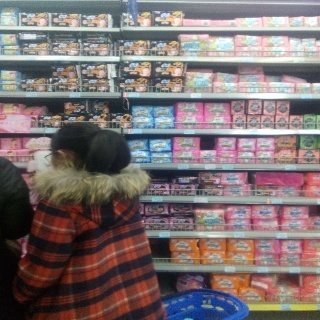
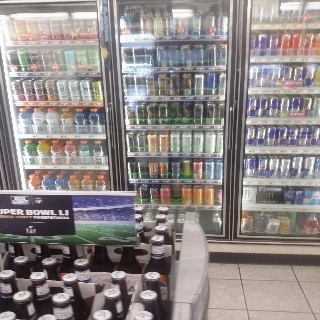
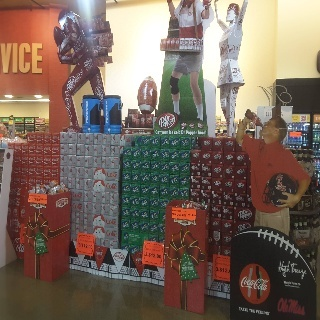
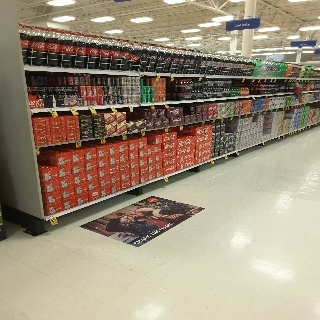
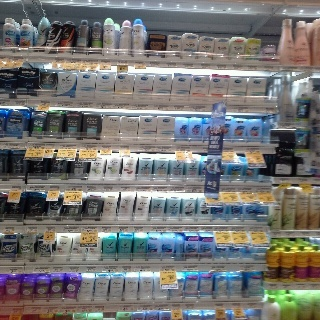
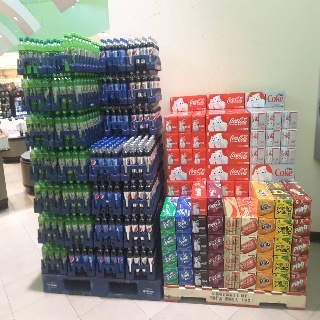
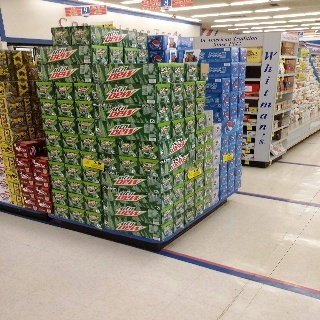
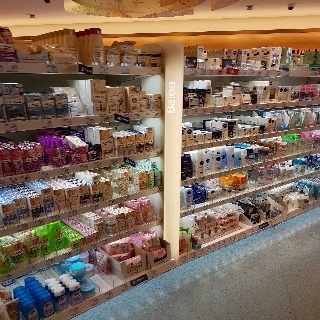
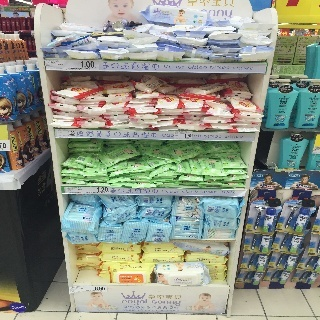
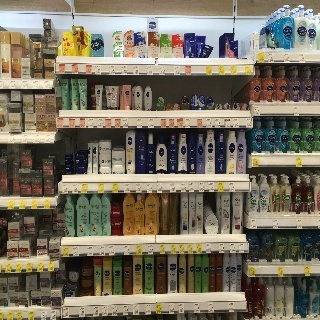
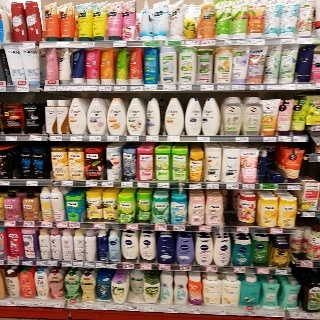
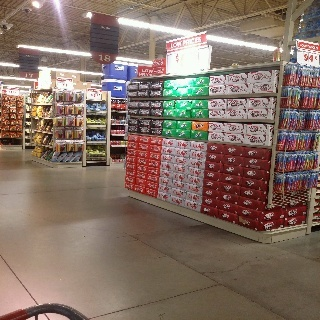
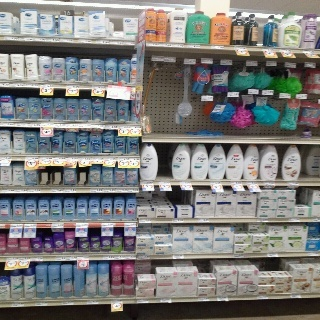
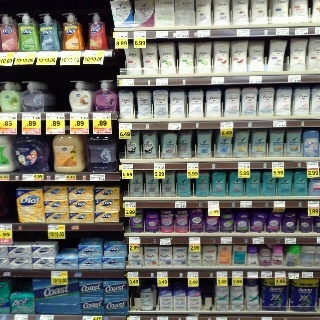
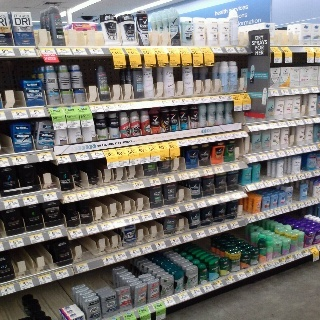
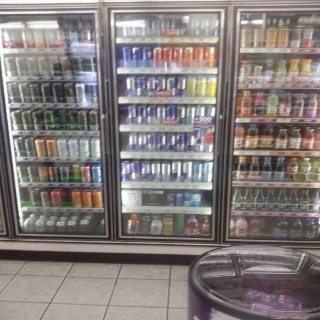
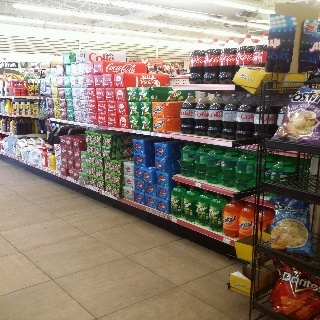
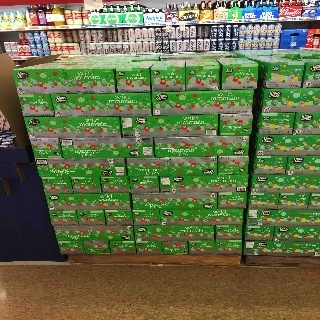
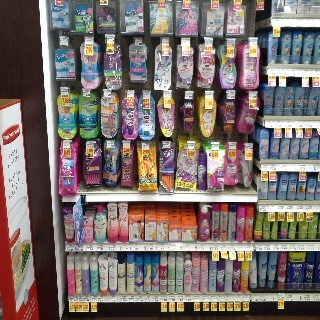
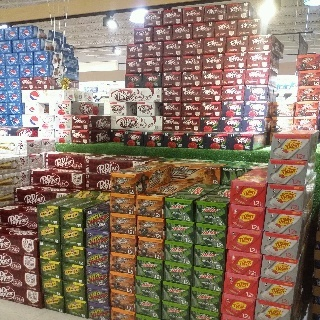

In [7]:
from IPython.display import HTML
HTML('./outliers.html')

## Now run with fastdup's default embedding network

In [8]:

!python -c "import fastdup ; fastdup.run('SKU110K_fixed/', work_dir='out2', num_images=2000)"

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
Found existing atrain_features.dat file in the working directory, please remove it before running the program or run in a fresh directory.
If you like to resume a prevuously stopped run, please run with resume=1.


In [9]:
fastdup.create_outliers_gallery('out2','.',max_width=400)

100%|██████████| 20/20 [00:02<00:00,  7.28it/s]


Stored outliers visual view in  ./outliers.html


,Image,Distance,Path
1173,,0.414600,SKU110K_fixed/images/train_5822.jpg
1171,,0.680554,SKU110K_fixed/images/train_7576.jpg
1170,,0.737160,SKU110K_fixed/images/train_6722.jpg
1167,,0.751158,SKU110K_fixed/images/train_6138.jpg
1166,,0.759745,SKU110K_fixed/images/test_923.jpg
1165,,0.773681,SKU110K_fixed/images/test_129.jpg
1163,,0.776552,SKU110K_fixed/images/train_2903.jpg
1162,,0.781242,SKU110K_fixed/images/train_3240.jpg
1161,,0.784841,SKU110K_fixed/images/train_3389.jpg
1160,,0.785731,SKU110K_fixed/images/train_3687.jpg

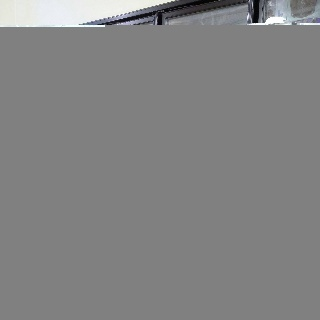
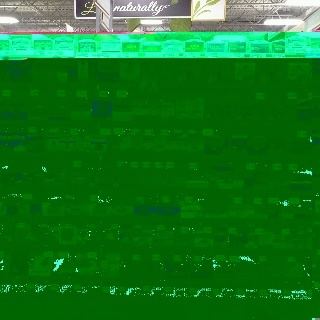
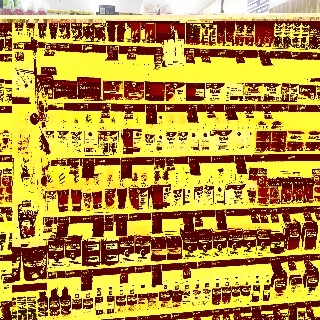
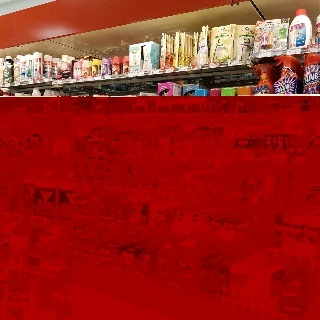
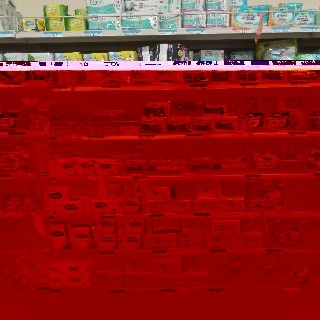
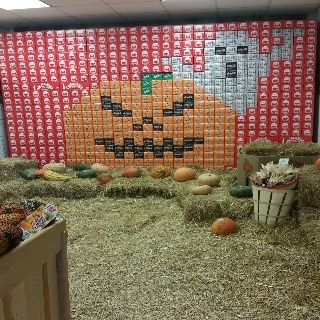
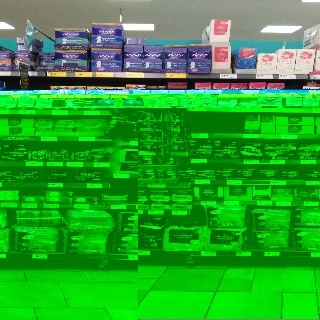
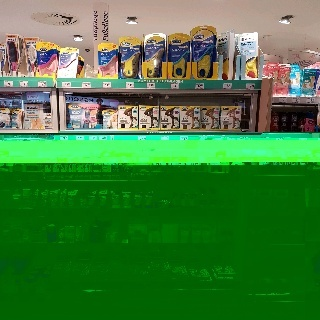
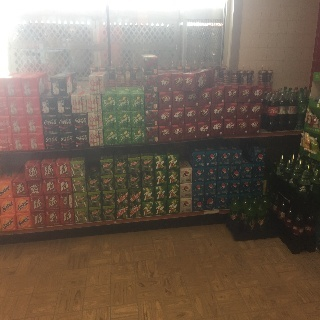
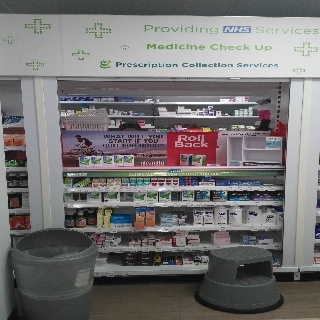
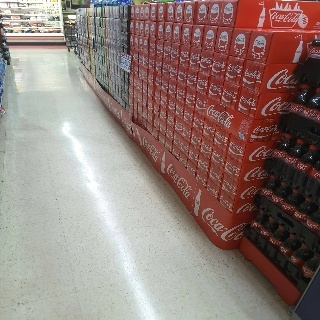
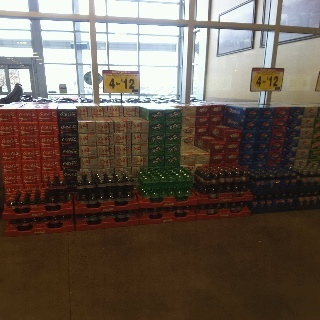
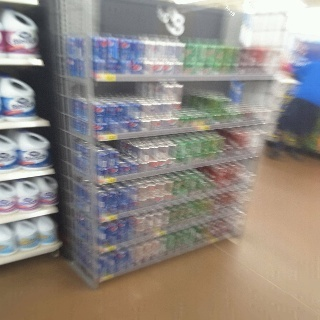
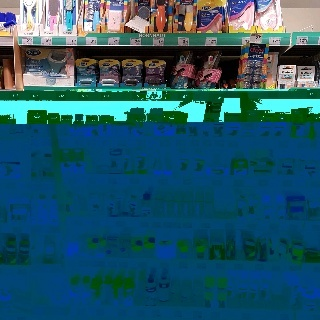
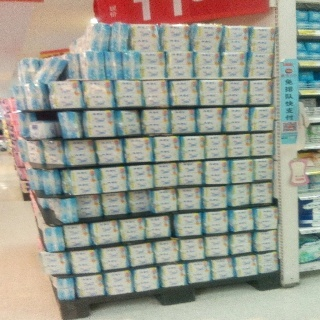
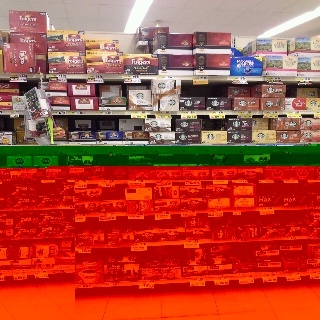
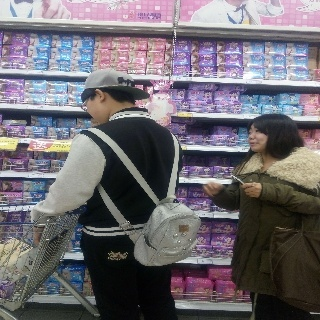
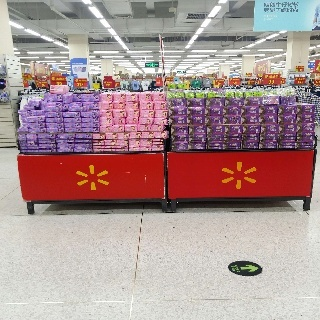
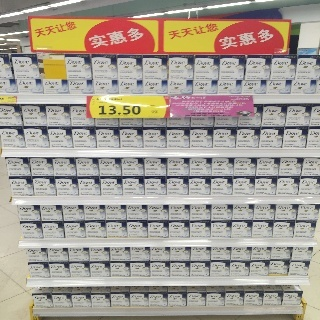
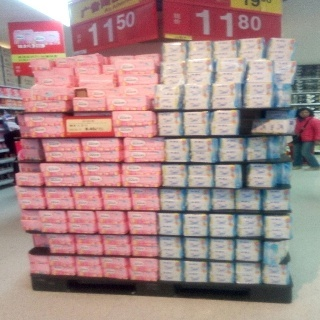

In [10]:
HTML('./outliers.html')

To conclude, the outliers by the resnet models are very different and mainly include persons in the image. Fastdup model outliers mainly capture corrupted or blurry images.